In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Functions

In [4]:
class Functions:
    a = 2
    b = 2
    c = 3/4
    d = 4
    e = 2
    f = 3
    m = 1/3
    std = 0.01
    
    def f1(self ,x):
        # y = mx + b.
        Y = np.random.normal(self.m*x + self.b,self.std)
        return  Y

    def f2(self ,x):
        # y = acos(bx) + csin(dx) + e.
        Y = np.random.normal(self.a*np.cos(self.b*x) + self.c*np.sin(self.d*x) + self.e, self.std)
        return Y

    def f3(self ,x):
        # y = a*exp(bx)*cos(cx) + d*exp(ex)*sin(fx).
        Y = np.random.normal(self.a*np.exp(self.b*x)*np.cos(self.c*x) + self.d*np.exp(self.e*x)*np.sin(self.f*x), self.std)
        return  Y

    def f4(self ,x):
        # y = asin(bx) + ccos(dx) + e.
        Y = np.random.normal(self.a*np.sin(self.b*x) + self.c*np.cos(self.d*x) + self.e, self.std)
        return  Y
        

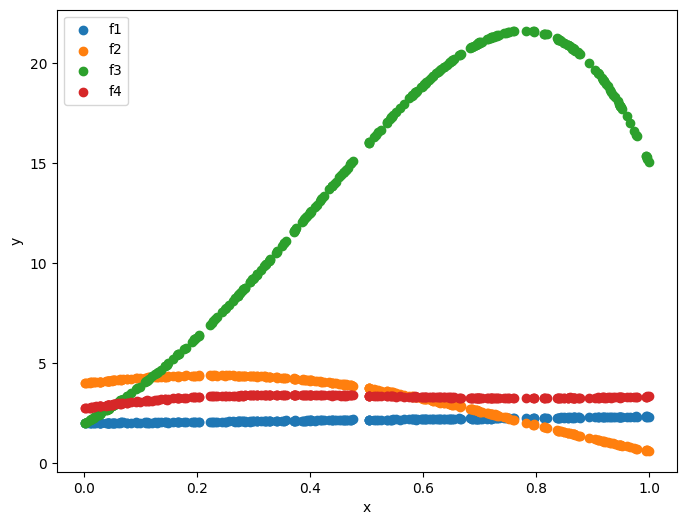

In [5]:
# Generate x values
x = np.random.uniform(low=0.0, high=1.0, size = 300)
F = Functions()
y_f1 = F.f1(x)
y_f2 = F.f2(x)
y_f3 = F.f3(x)
y_f4 = F.f4(x)

# Plot each function
plt.figure(figsize=(8, 6))
plt.scatter(x, y_f1, label = 'f1')
plt.scatter(x, y_f2, label = 'f2')
plt.scatter(x, y_f3, label = 'f3')
plt.scatter(x, y_f4, label = 'f4')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
def train_val_test_split(X, y, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_state=None):
    # Shuffle the data
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    X = X[indices]
    y = y[indices]

    # Split the data
    train_size = int(len(X) * train_ratio)
    val_size = int(len(X) * val_ratio)
    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
    X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

    return X_train, y_train, X_val, y_val, X_test, y_test


In [7]:
# Split the data for each function into training, validation, and testing sets
X_train_f1, y_train_f1, X_val_f1, y_val_f1, X_test_f1, y_test_f1 = train_val_test_split(x, y_f1)
X_train_f2, y_train_f2, X_val_f2, y_val_f2, X_test_f2, y_test_f2 = train_val_test_split(x, y_f2)
X_train_f3, y_train_f3, X_val_f3, y_val_f3, X_test_f3, y_test_f3 = train_val_test_split(x, y_f3)
X_train_f4, y_train_f4, X_val_f4, y_val_f4, X_test_f4, y_test_f4 = train_val_test_split(x, y_f4)

## Univariate Linear Regression

In [8]:
class UnivariateLinearRegression:
    slope = 0
    y_intercept = 0
    def fit(self, X, y, learning_rate=0.1, num_iterations=1000000):
        n = len(y)
        for i in range(num_iterations):
            y_predicted = self.slope*X + self.y_intercept
            error = y_predicted - y
            self.slope -= learning_rate * (1/n) * np.sum(error*X)
            self.y_intercept -= learning_rate * (1/n) * np.sum(error)

    def plot_linear(self, x, y_f):
        print(f"Slope: {self.slope}, Y-intercept: {self.y_intercept}")
        y = x*self.slope + self.y_intercept
        plt.plot(x, y, label = 'Predicted', color = 'red')
        plt.scatter(x, y_f, label = 'Actual')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

Slope: 0.33563383567472244, Y-intercept: 1.9992825198338064


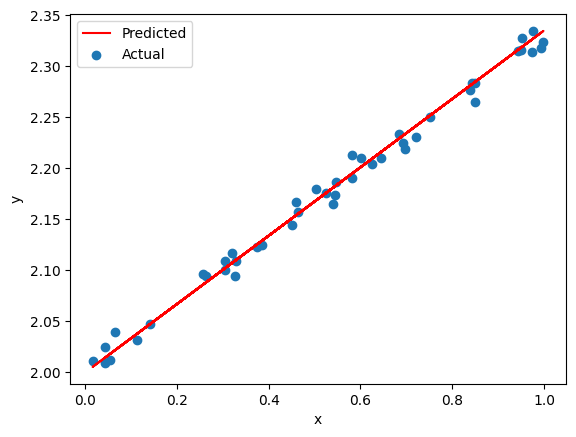

In [9]:
LinRegModel = UnivariateLinearRegression()
LinRegModel.fit(X_train_f1, y_train_f1)
LinRegModel.plot_linear(X_test_f1, y_test_f1)

Slope: -3.821642038144718, Y-intercept: 5.104560918209674


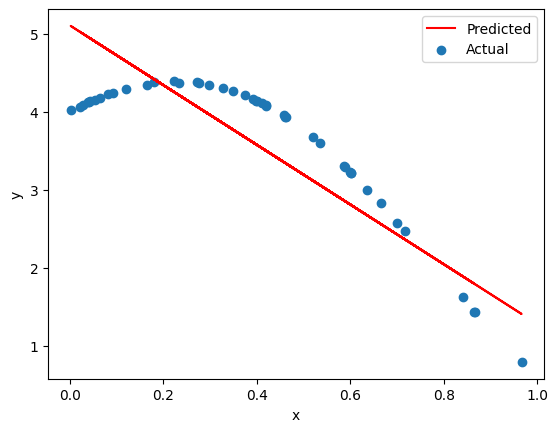

In [10]:
LinRegModel2 = UnivariateLinearRegression()
LinRegModel2.fit(X_train_f2, y_train_f2)
LinRegModel2.plot_linear(X_test_f2, y_test_f2)

Slope: 20.456170496269625, Y-intercept: 3.645728693843659


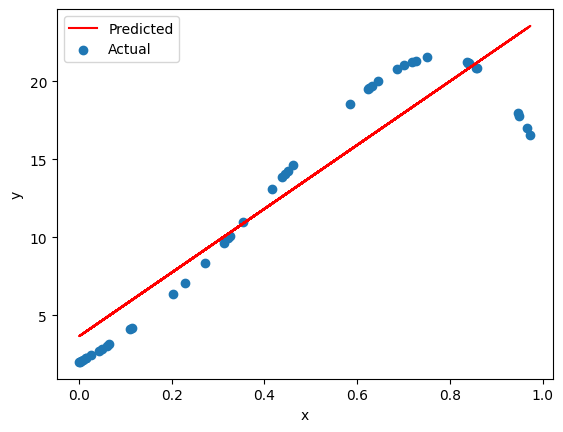

In [11]:
LinRegModel3 = UnivariateLinearRegression()
LinRegModel3.fit(X_train_f3, y_train_f3)
LinRegModel3.plot_linear(X_test_f3, y_test_f3)

Slope: 0.2342168828334708, Y-intercept: 3.143706762348609


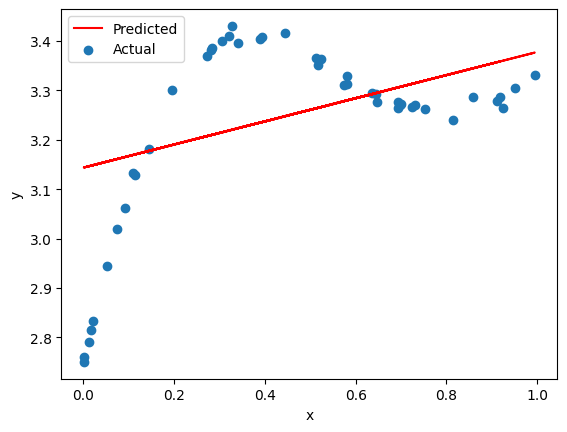

In [12]:
LinRegModel4 = UnivariateLinearRegression()
LinRegModel4.fit(X_train_f4, y_train_f4)
LinRegModel4.plot_linear(X_test_f4, y_test_f4)

## Polinomial Linear Regression

In [13]:

class PolinomialLinearRegression:
    def printFunction(self):
        print(f"Polynomial function of degree {self.degree}:")
        print(f"y = {self.weights[0]} + ", end="")
        for i in range(1, self.degree+1):
            if i == 1:
                print(f"{self.weights[i]}x", end="")
            else:
                print(f" + {self.weights[i]}x^{i}", end="")
    # Function to calculate the weight vector for a given degree
    def calculate_weights(self, degree, X, y, learning_rate=0.1, num_iterations=100000):
        n = len(X)
        self.degree = degree
        # Create matrix X_poly with columns X to the power i, starting from X**0
        X_poly = np.concatenate([X.reshape(n, 1)**i for i in range(degree+1)], axis=1)
        # Initialize weights to zeros
        self.weights = np.zeros(degree+1)

        # Gradient descent loop
        for i in range(num_iterations):
            # Calculate predicted outputs for each input in X_poly
            y_predicted = np.dot(X_poly, self.weights)
            
            # Calculate errors and gradient of the mean squared error with respect to each weight
            error = y_predicted - y
            # Compute the gradient and update weights
            gradient = (2/n) * np.dot(X_poly.T, error)
            self.weights -= learning_rate * gradient

    # def calculate_weights(degree, X, y, learning_rate=0.1, num_iterations=1000000):
    #     n = len(y)
    #     X_poly = np.concatenate([X.reshape(n, 1)**i for i in range(degree+1)], axis=1)
    #     weights = np.zeros(degree+1)
        
    #     for i in range(num_iterations):
    #         y_predicted = np.zeros(n)
    #         for d in range(degree+1):
    #             y_predicted += weights[d] * X_poly[:, d]
    #         error = y_predicted - y
    #         gradient = np.zeros(degree+1)
    #         for d in range(degree+1):
    #             gradient[d] = (2/n) * np.sum(error * X_poly[:, d])
    #         weights -= learning_rate * gradient
    #     return weights
    def predict(self, x):
        return np.sum([self.weights[i]*x**i for i in range(self.degree+1)], axis = 0)
    def plotModel(self, X_test, Y_test, X, Y, Leb = "Testing Data"):
        # Plot the data points and the fitted curve
        plt.scatter(X_test, Y_test, label=Leb)
        plt.plot(X, Y, label="Polynomial function", color="red")
        # plt.plot(x_range,y_actual, label='Actual function')
        plt.legend()
        plt.xlabel('X')
        plt.ylabel('y')
        plt.show()


In [14]:
# Evaluate the polynomial function over a range of x values
x_range = np.linspace(0, 1, 100)

Polynomial function of degree 3:
y = 2.0023289645075484 + 0.29862385078011916x + 0.08970565017320878x^2 + -0.05828494905644882x^3

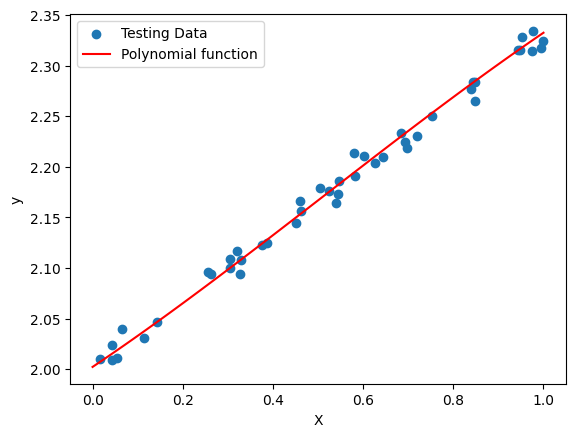

In [15]:
PolModel1 = PolinomialLinearRegression()
PolModel1.calculate_weights(degree = 3, X = X_train_f1, y = y_train_f1)
PolModel1.printFunction()
y1_pred = PolModel1.predict(x_range)
# y4_actual = F.f1(x_range)
PolModel1.plotModel(X_test_f1, y_test_f1, x_range, y1_pred)

Polynomial function of degree 3:
y = 3.956449505044375 + 4.440620207469911x + -11.740717343698162x^2 + 3.8277207182642554x^3

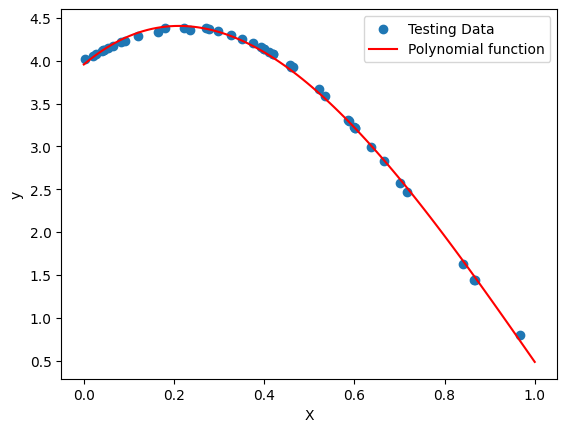

In [16]:
PolModel2 = PolinomialLinearRegression()
PolModel2.calculate_weights(degree = 3, X = X_train_f2, y = y_train_f2)
PolModel2.printFunction()
y2_pred = PolModel2.predict(x_range)
# y4_actual = F.f2(x_range)
PolModel2.plotModel(X_test_f2, y_test_f2, x_range, y2_pred)

Polynomial function of degree 3:
y = 2.268418112606761 + 6.705283083712373x + 77.61929453083886x^2 + -70.72573905344385x^3

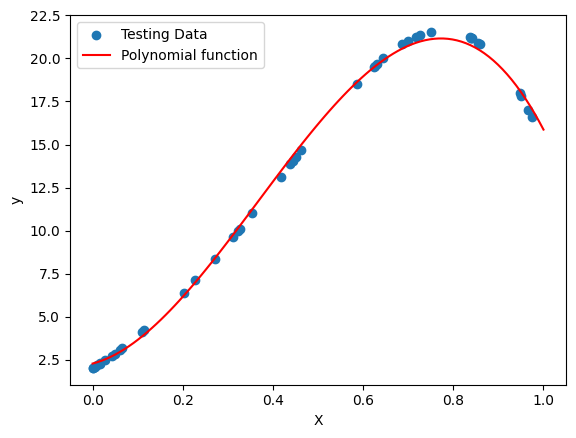

In [17]:
PolModel3 = PolinomialLinearRegression()
PolModel3.calculate_weights(degree = 3, X = X_train_f3, y = y_train_f3)
PolModel3.printFunction()
y3_pred = PolModel3.predict(x_range)
# y4_actual = F.f3(x_range)
PolModel3.plotModel(X_test_f3, y_test_f3, x_range, y3_pred)

Polynomial function of degree 3:
y = 2.780131672821452 + 3.73897331939813x + -6.987301041649956x^2 + 3.8102647611492193x^3

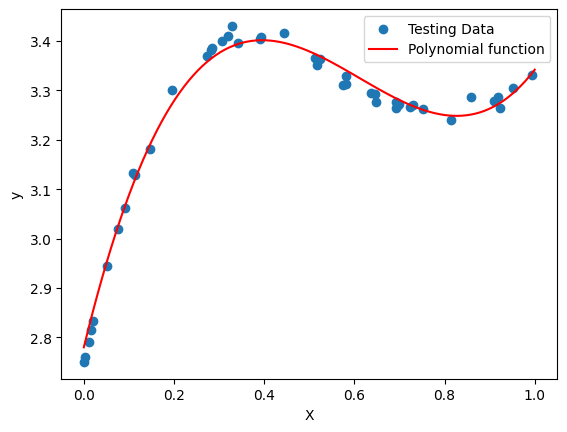

In [18]:
PolModel4 = PolinomialLinearRegression()
PolModel4.calculate_weights(degree = 3, X = X_train_f4, y = y_train_f4)
PolModel4.printFunction()
y4_pred = PolModel4.predict(x_range)
# y4_actual = F.f4(x_range)
PolModel4.plotModel(X_test_f4, y_test_f4, x_range, y4_pred)

In [19]:
def CalculateRMSE(Predicted, Actual):
    return np.sqrt(((Predicted-Actual)**2).mean())

## OverFitting

In [20]:
#to find best degree of polinomial for F4
bestdegree = -1
bestRMSE = 999999999
for i in range(1,20):
    PolModel = PolinomialLinearRegression()
    PolModel.calculate_weights(degree = i, X = X_train_f4, y = y_train_f4)
    Y_pred = PolModel.predict(X_val_f4)
    RMSE = CalculateRMSE(y_val_f4, Y_pred)
    print(i, RMSE)
    if(RMSE < bestRMSE):
        bestRMSE = RMSE
        bestdegree = i
    
print()
print(bestdegree, bestRMSE)

1 0.135596649506666
2 0.09237911694684706
3 0.018930204665812352
4 0.022481612034068555
5 0.02783248678235978
6 0.02574663026095993
7 0.019869113505405357
8 0.016359479859460888
9 0.01714866393446422
10 0.01940273284015035
11 0.02135863334864627
12 0.022621579697907616
13 0.023172965008335582
14 0.023100545529526454
15 0.022553350599458295
16 0.02172339806992811
17 0.020819968130176426
18 0.02003422344429027
19 0.019501666180209307

8 0.016359479859460888


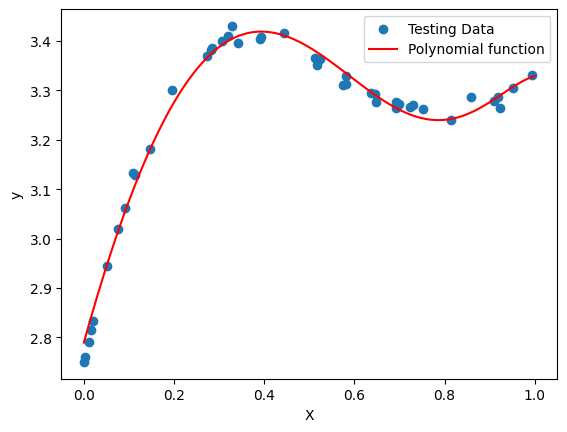

In [21]:
BestFItModel4 = PolinomialLinearRegression()
BestFItModel4.calculate_weights(degree = bestdegree, X = X_train_f4, y = y_train_f4)
yLine4 = BestFItModel4.predict(x_range)
BestFItModel4.plotModel(X_test_f4, y_test_f4, x_range, yLine4)

OverFitting
as highest degree is 19 but we never get minimum RMSE when degree = 19. In most of the cases we get best degree as 3 ( may vary as split of data is random each time). SO when we train data with degree 19 we get overfitting

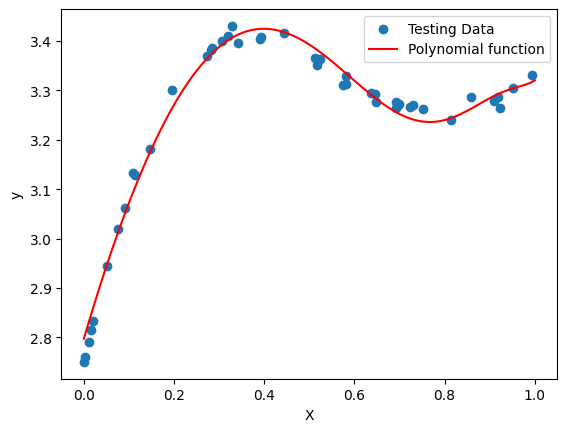

In [22]:
OverFitModel4 = PolinomialLinearRegression()
OverFitModel4.calculate_weights(degree = 19, X = X_train_f4, y = y_train_f4)
yLine = OverFitModel4.predict(x_range)
OverFitModel4.plotModel(X_test_f4, y_test_f4, x_range, yLine)

In [23]:
#to find best degree of polinomial for F1
bestdegree = -1
bestRMSE = 999999999
for i in range(1,20):
    PolModel = PolinomialLinearRegression()
    PolModel.calculate_weights(degree = i, X = X_train_f1, y = y_train_f1)
    Y_pred = PolModel.predict(X_val_f1)
    RMSE = CalculateRMSE(y_val_f1, Y_pred)
    print(i, RMSE)
    if(RMSE < bestRMSE):
        bestRMSE = RMSE
        bestdegree = i
    
print()
print(bestdegree, bestRMSE)

1 0.00993856663257713
2 0.00992907868107476
3 0.0100612956672035
4 0.010060758747531241
5 0.010023227457147281
6 0.009992185501593287
7 0.009985714559524492
8 0.010001813422791517
9 0.010028406965985235
10 0.010054083096313716
11 0.01007322649797926
12 0.010085011531952702
13 0.010090607523840025
14 0.010091705013153164
15 0.010090112921830324
16 0.010087644099753624
17 0.010086012679706916
18 0.01008671525545279
19 0.010090917590321848

2 0.00992907868107476


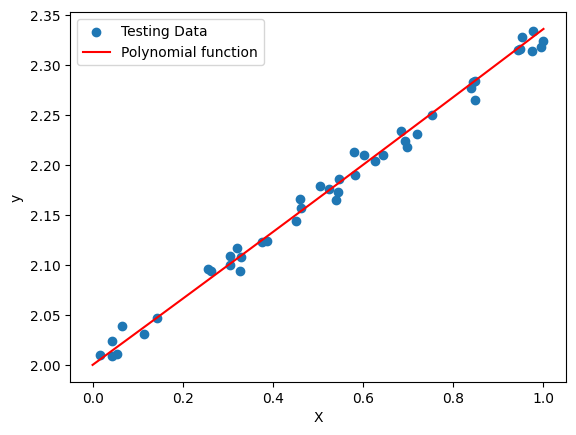

In [24]:
BestFItModel1 = PolinomialLinearRegression()
BestFItModel1.calculate_weights(degree = bestdegree, X = X_train_f1, y = y_train_f1)
yLine1 = BestFItModel1.predict(x_range)
BestFItModel1.plotModel(X_test_f1, y_test_f1, x_range, yLine1)

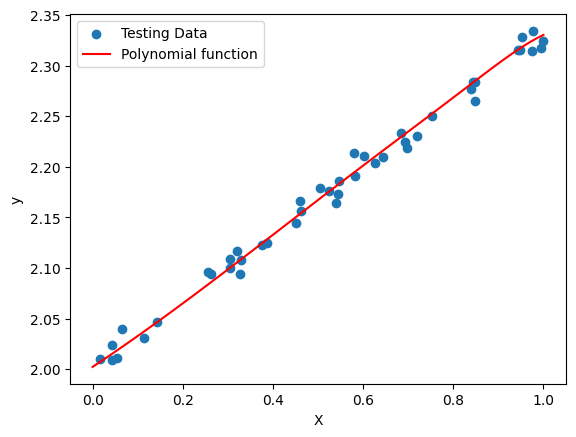

In [25]:
OverFitModel1 = PolinomialLinearRegression()
OverFitModel1.calculate_weights(degree = 19, X = X_train_f1, y = y_train_f1)
yLine = OverFitModel1.predict(x_range)
OverFitModel1.plotModel(X_test_f1, y_test_f1, x_range, yLine)
# Y_pred = PolModel.predict(X_val_f1)
# RMSE = CalculateRMSE(y_val_f1, Y_pred)
# RMSE

In [26]:
#to find best degree of polinomial for F2
bestdegree = -1
bestRMSE = 999999999
for i in range(1,20):
    PolModel = PolinomialLinearRegression()
    PolModel.calculate_weights(degree = i, X = X_train_f2, y = y_train_f2)
    Y_pred = PolModel.predict(X_val_f2)
    RMSE = CalculateRMSE(y_val_f2, Y_pred)
    print(i, RMSE)
    if(RMSE < bestRMSE):
        bestRMSE = RMSE
        bestdegree = i
    
print()
print(bestdegree, bestRMSE)

1 0.5217504391070148
2 0.10338778639193696
3 0.040006411654368926
4 0.019796079001342223
5 0.012120222942171948
6 0.017520151721701044
7 0.016270723592524378
8 0.0120787004611592
9 0.010541266607516515
10 0.011426076226215932
11 0.01305787236456379
12 0.014811077113746575
13 0.01629047336688057
14 0.01723552587130415
15 0.017552345786329412
16 0.017282376806487504
17 0.016560010302542828
18 0.015573555772081688
19 0.01452842276984636

9 0.010541266607516515


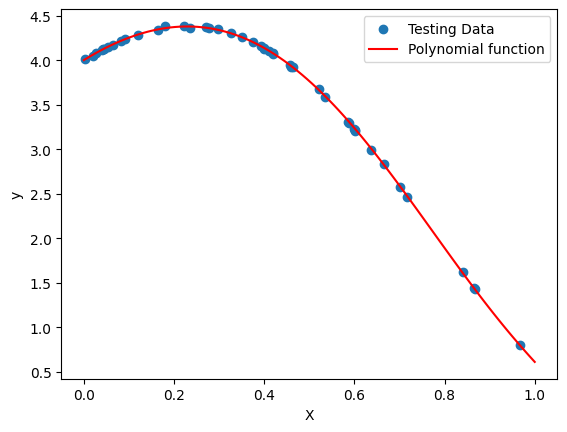

In [27]:
BestFItModel2 = PolinomialLinearRegression()
BestFItModel2.calculate_weights(degree = bestdegree, X = X_train_f2, y = y_train_f2)
yLine2 = BestFItModel2.predict(x_range)
BestFItModel2.plotModel(X_test_f2, y_test_f2, x_range, yLine2)

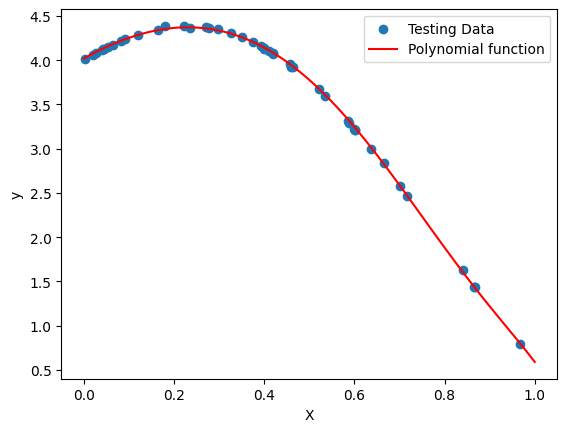

In [28]:
OverFitModel2 = PolinomialLinearRegression()
OverFitModel2.calculate_weights(degree = 19, X = X_train_f2, y = y_train_f2, learning_rate=0.1)
yLine = OverFitModel2.predict(x_range)
OverFitModel2.plotModel(X_test_f2, y_test_f2, x_range, yLine)

In [29]:
#to find best degree of polinomial for F3
bestdegree = -1
bestRMSE = 999999999
for i in range(1,20):
    PolModel = PolinomialLinearRegression()
    PolModel.calculate_weights(degree = i, X = X_train_f3, y = y_train_f3)
    Y_pred = PolModel.predict(X_val_f3)
    RMSE = CalculateRMSE(y_val_f3, Y_pred)
    print(i, RMSE)
    if(RMSE < bestRMSE):
        bestRMSE = RMSE
        bestdegree = i
    
print()
print(bestdegree, bestRMSE)

1 2.1575448790493836
2 1.434955077264666
3 0.25405923790835366
4 0.04241844822137632
5 0.07578741993595237


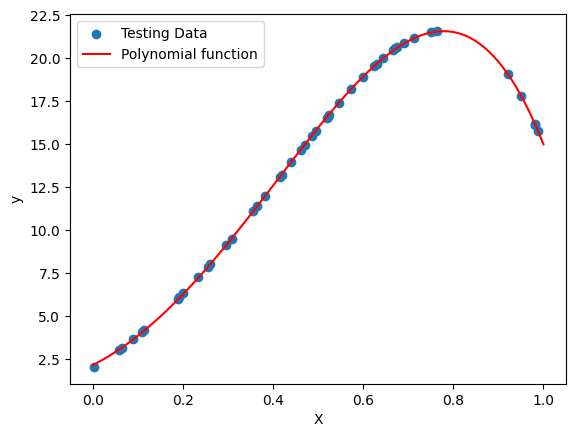

In [ ]:
BestFItModel3 = PolinomialLinearRegression()
BestFItModel3.calculate_weights(degree = bestdegree, X = X_train_f3, y = y_train_f3)
yLine3 = BestFItModel3.predict(x_range)
BestFItModel3.plotModel(X_test_f3, y_test_f3, x_range, yLine3)

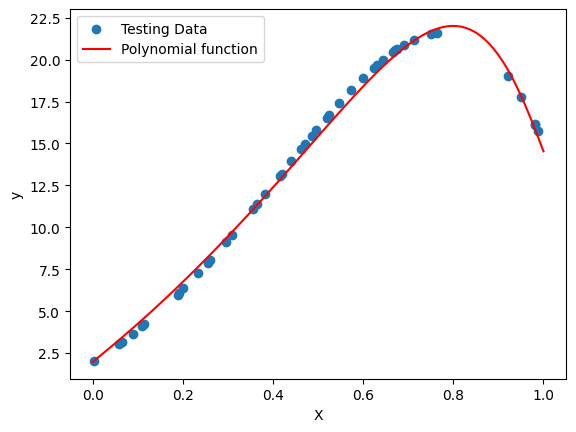

In [ ]:
OverFitModel3 = PolinomialLinearRegression()
OverFitModel3.calculate_weights(degree = 19, X = X_train_f3, y = y_train_f3, learning_rate=0.1)
yLine = OverFitModel3.predict(x_range)
OverFitModel3.plotModel(X_test_f3, y_test_f3, x_range, yLine)

## Plot of F1 Function

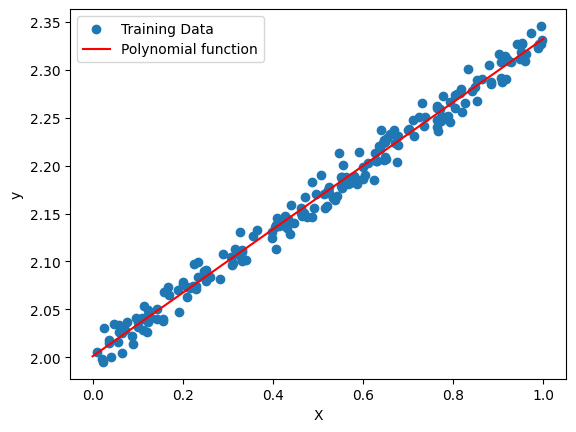

In [ ]:
BestFItModel1.plotModel(X_train_f1, y_train_f1, x_range, yLine1, "Training Data")

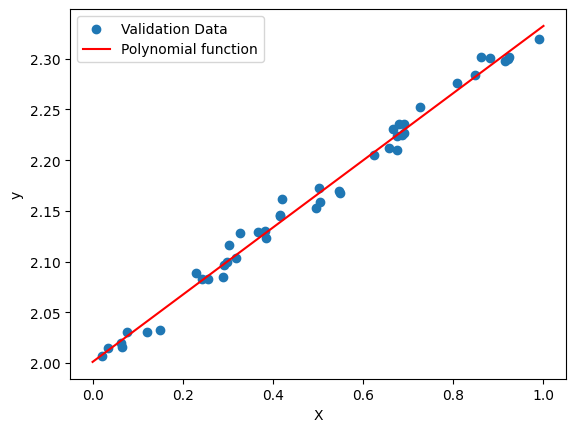

In [ ]:
BestFItModel1.plotModel(X_val_f1, y_val_f1, x_range, yLine1, "Validation Data")

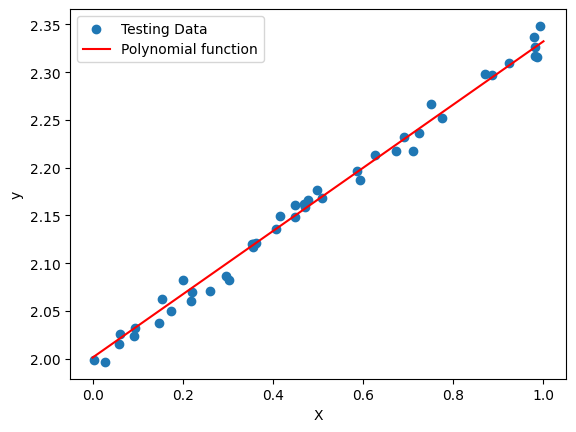

In [ ]:
BestFItModel1.plotModel(X_test_f1, y_test_f1, x_range, yLine1, "Testing Data")

## Plot of F2 Function

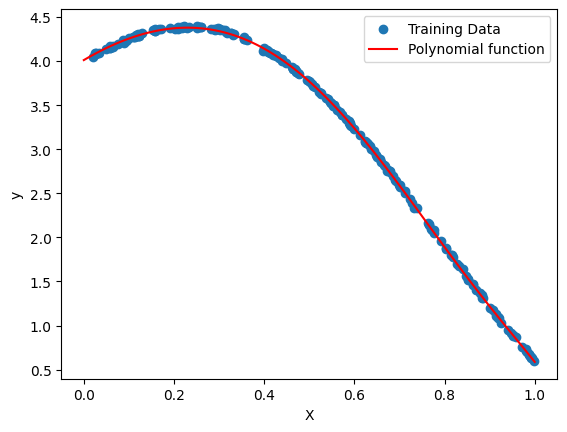

In [ ]:
BestFItModel2.plotModel(X_train_f2, y_train_f2, x_range, yLine2, "Training Data")

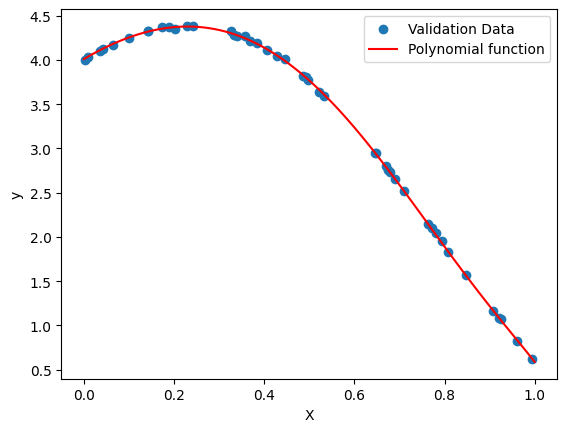

In [ ]:
BestFItModel2.plotModel(X_val_f2, y_val_f2, x_range, yLine2, "Validation Data")

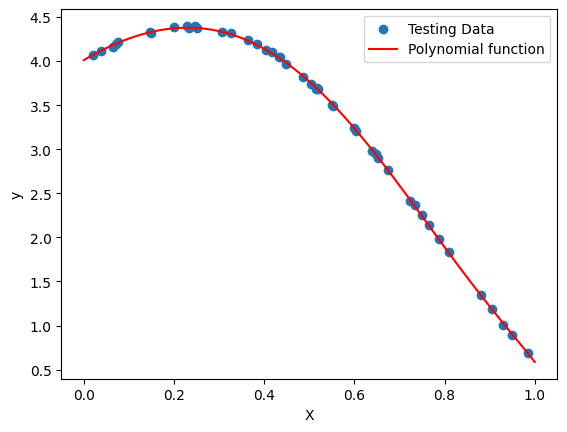

In [ ]:
BestFItModel2.plotModel(X_test_f2, y_test_f2, x_range, yLine2, "Testing Data")

## Plot of F3 Function

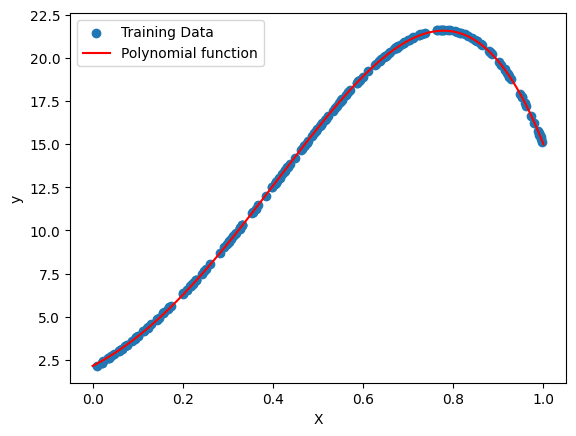

In [ ]:
BestFItModel3.plotModel(X_train_f3, y_train_f3, x_range, yLine3, "Training Data")

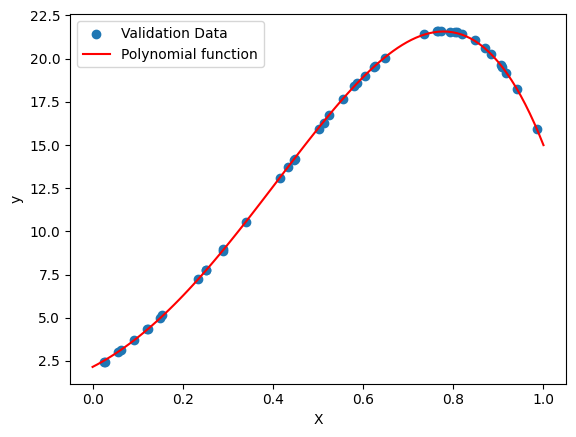

In [ ]:
BestFItModel3.plotModel(X_val_f3, y_val_f3, x_range, yLine3, "Validation Data")

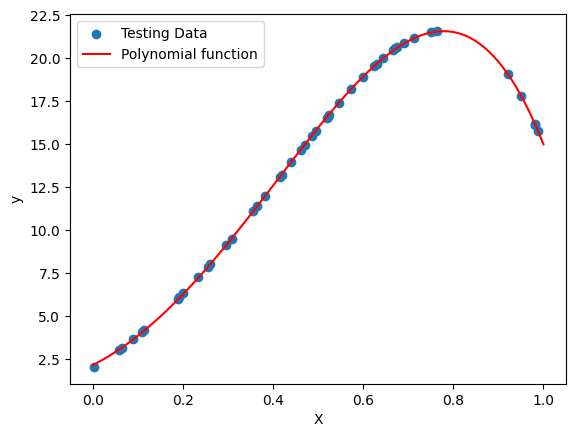

In [ ]:
BestFItModel3.plotModel(X_test_f3, y_test_f3, x_range, yLine3, "Testing Data")

## Plot of F4 Function

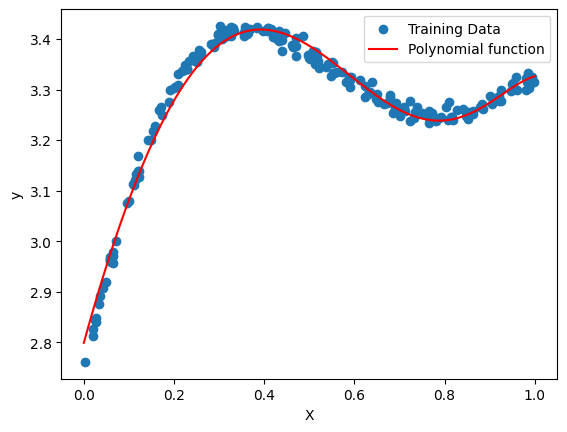

In [ ]:
BestFItModel4.plotModel(X_train_f4, y_train_f4, x_range, yLine4, "Training Data")

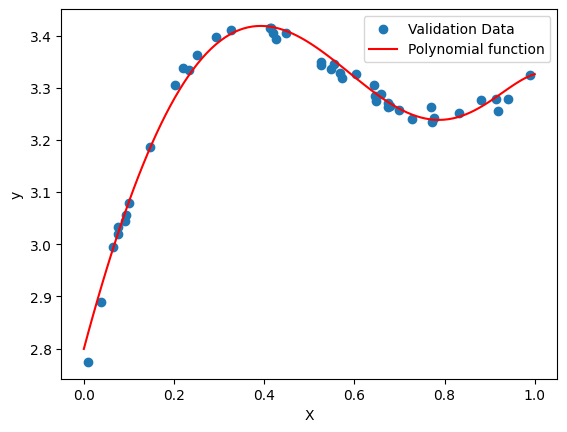

In [ ]:
BestFItModel4.plotModel(X_val_f4, y_val_f4, x_range, yLine4, "Validation Data")

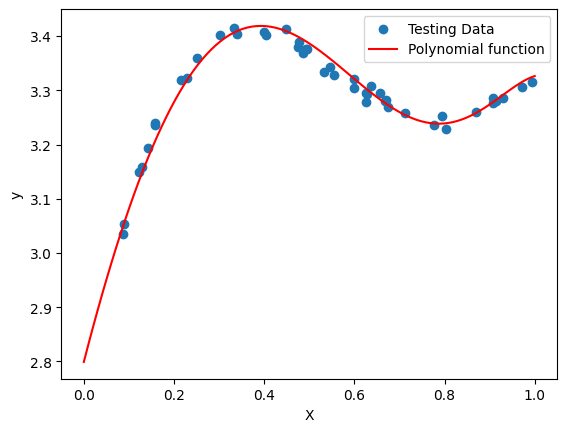

In [ ]:
BestFItModel4.plotModel(X_test_f4, y_test_f4, x_range, yLine4, "Testing Data")